In [0]:
import numpy as np
from keras.preprocessing import image
from keras.utils import np_utils
from keras.models import model_from_json
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
import json

Using TensorFlow backend.


In [0]:
from google.colab import files
files.upload()

Saving argillite.jpg to argillite.jpg
Saving sandstone.jpg to sandstone.jpg


{'argillite.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x04\x04\x04\x04\x03\x05\x04\x04\x04\x06\x05\x05\x06\x08\r\x08\x08\x07\x07\x08\x10\x0b\x0c\t\r\x13\x10\x14\x13\x12\x10\x12\x12\x14\x17\x1d\x19\x14\x16\x1c\x16\x12\x12\x1a#\x1a\x1c\x1e\x1f!!!\x14\x19$\'$ &\x1d ! \xff\xdb\x00C\x01\x05\x06\x06\x08\x07\x08\x0f\x08\x08\x0f \x15\x12\x15                                                  \xff\xc0\x00\x11\x08\x01@\x01\xaa\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x01\x03\x04\x05\x06\x07\x08\xff\xc4\x00D\x10\x00\x02\x02\x02\x01\x02\x04\x04\x04\x03\x04\x07\x07\x04\x03\x00\x01\x02\x00\x03\x04\x11\x12\x05!\x131AQ\x06"aq\x142\x81\x91#B\xc1\x07\x153\xa1\x16CDRr\xb1\xd1$4T\x92\xe1\xf0\xf1\x17%b\x83S\x82\x93\xff\xc4\x00\x1a\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x05\x04\x06\xff\xc4\x00!\x11\x01\x01\x00\x02\x02\x02\x0

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


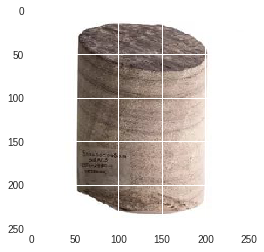

In [0]:
img_path = 'sandstone.jpg'
img = image.load_img(img_path, target_size=(250, 250))
plt.imshow(img)

In [0]:
# Преобразуем изображением в массив numpy
x = image.img_to_array(img)

In [0]:
x = 255 - x
x /= 255
x = np.expand_dims(x, axis=0)

In [0]:
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        model = load_model('/content/drive/My Drive/Colab Notebooks/model.h5')

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
prediction = model.predict(x)

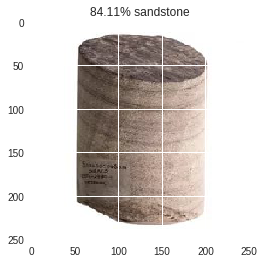

In [0]:
result = prediction
plt.imshow(img)
if (result > 0.5):
  plt.title("%.2f" % (result[0]*100) + "% moto")
else:
  plt.title("%.2f" % ((1-result[0])*100) + "% car")
